/home/nishanth/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/nishanth/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/home/nishanth/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/nishanth/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.48381D+00    |proj g|=  1.25592D-02

At iterate    5    f=  3.48186D+00    |proj g|=  2.29544D-02

At iterate   10    f=  3.48011D+00    |proj g|=  1.87280D-03

At iterate   15    f=  3.48005D+00    |proj g|=  2.13559D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     18     23      1     0     0   1.877D-05   3.480D+00
  F =   3.4800520445838061     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


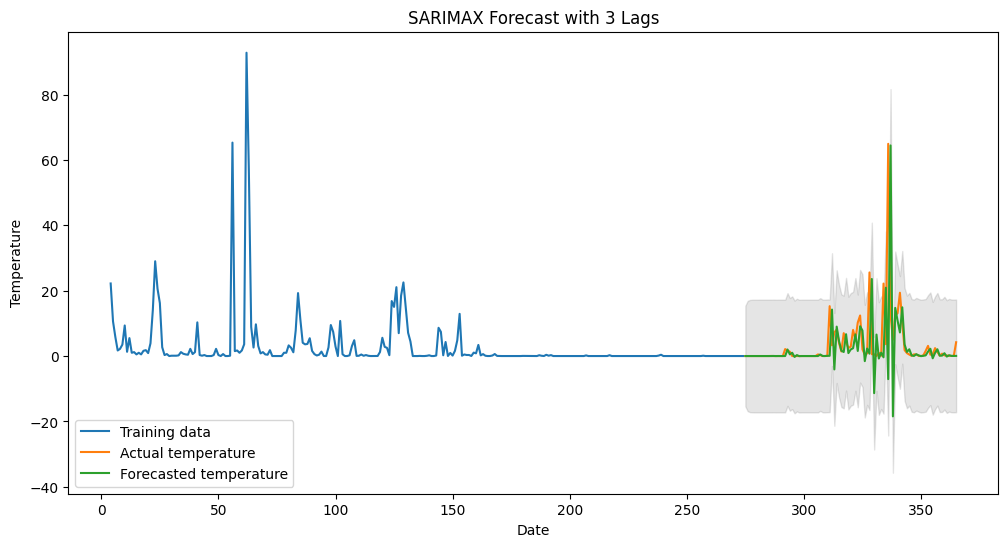

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.model_selection import train_test_split

temperature_data = pd.read_csv('temp.csv')

# Create lagged features
temperature_data['lag1'] = temperature_data['temperature'].shift(1)
temperature_data['lag2'] = temperature_data['temperature'].shift(2)
temperature_data['lag3'] = temperature_data['temperature'].shift(3)
temperature_data['lag4'] = temperature_data['temperature'].shift(4)

# Drop NaN values resulting from lagging
temperature_data = temperature_data.dropna()

# Split data into train and test sets
train, test = train_test_split(temperature_data, shuffle=False)

# Define and fit the SARIMAX model
model = SARIMAX(train['temperature'], exog=train[['lag1','lag2','lag3','lag4']], order=(1, 0, 0), seasonal_order=(0, 0, 0, 0))
results = model.fit()

# Forecast using the model
forecast = results.get_forecast(steps=len(test), exog=test[['lag1','lag2','lag3','lag4']])
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['temperature'], label='Training data')
plt.plot(test.index, test['temperature'], label='Actual temperature')
plt.plot(test.index, forecast_mean, label='Forecasted temperature')
plt.fill_between(test.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='k', alpha=0.1)
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('SARIMAX Forecast with 3 Lags')
plt.legend()
plt.show()